In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Graph layouts

## b) create graph and assign edge attributes

In [5]:
G = nx.gnp_random_graph(50,0.2)
radii = [np.random.rand() for i in range(len(G.edges()))]
nx.set_edge_attributes(G,'radius',dict(zip(G.edges(),radii)))

## c) plot and save graph in spring layout

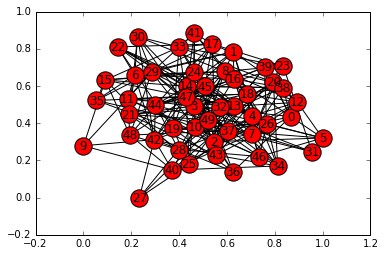

In [6]:
pos = nx.spring_layout(G,weight='radius')
plt.clf()
nx.draw_networkx(G,pos)
plt.savefig("c_spring_layout.png")

## d) plot and save graph in shell layout

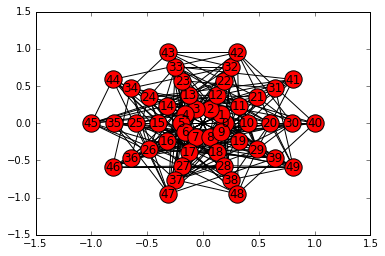

In [8]:
nlist = [range(0,10),range(10,20),range(20,30),range(30,40),range(40,50)]
pos = nx.shell_layout(G,nlist = nlist)
plt.clf()
nx.draw_networkx(G,pos)
plt.savefig("d_shell_layout.pdf")

## e) 3d plot with matplotlib

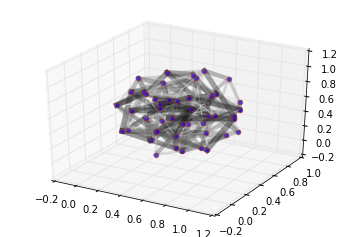

In [10]:
pos = nx.spring_layout(G,k=2*(1/np.sqrt(len(G.nodes()))),dim=3)
fig = plt.figure()
ax = fig.gca(projection='3d')
#plot the nodes
for n in G.nodes():
    x = pos[n][0]
    y = pos[n][1]
    z = pos[n][2]
    ax.scatter(x, y, z, color='FireBrick', alpha=0.6)

#plot the edges    
for e in G.edges():
    x1 = pos[e[0]][0]
    x2 = pos[e[1]][0]
    y1 = pos[e[0]][1]
    y2 = pos[e[1]][1]
    z1 = pos[e[0]][2]
    z2 = pos[e[1]][2]
    radius = G.edge[e[0]][e[1]]['radius']
    color = (1.0 - radius, 1.0 - radius, 1.0 - radius)
    ax.plot([x1,x2],[y1,y2],[z1,z2],color=color,alpha=0.4,linewidth=5*radius+1)
    
plt.savefig("e_3d_plot.pdf")

# Graph colorings

## a) load graph and investigate size

In [12]:
G = nx.read_graphml("../data/visualization/huge_graph.xml")
print("The graph contains %d nodes and %d edges"%(len(G.nodes()),len(G.edges())))

The graph contains 23820 nodes and 26137 edges


## b) and c) plot graph with modified color and size attributes

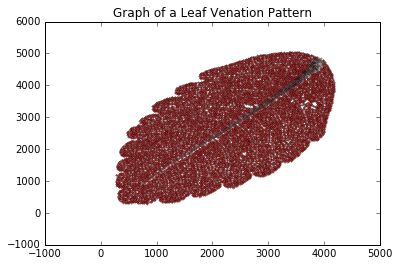

In [13]:
pos = {}
for k in G.node.keys():
    pos[k] = (G.node[k]['x'],G.node[k]['y'])
widths = np.asarray([e[2]['radius'] for e in G.edges(data=True)])
#scale the widths so individual edges are visible
widths = widths/widths.max()*10

plt.figure()
plt.title('Graph of a Leaf Venation Pattern')
#resize the node_size and choose colors and alpha in a way that the plot looks nice
nx.draw_networkx_nodes(G,pos=pos,node_size=2,node_color='FireBrick',alpha=0.6,\
                       linewidths=0.2)
nx.draw_networkx_edges(G,pos=pos,width=widths,color='DarkSlateGray',alpha=0.4)

## d) node degree and node coloring

The maximum node degree in the graph is 3


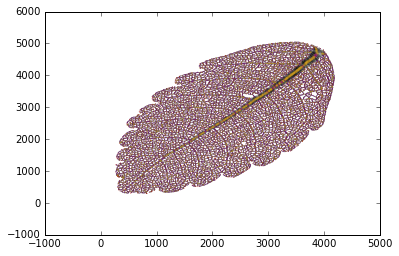

In [18]:
degree_dict = nx.degree(G)
degrees = np.asarray(list(degree_dict.values()))
max_degree = degrees.max()
print("The maximum node degree in the graph is %d"%(max_degree))

color_dict = {1:'red',2:'purple',3:'GoldenRod'}
colors = [color_dict[degree_dict[n]] for n in G.nodes()]

node_sizes = [n[1]['conductivity'] for n in G.nodes(data=True)]
node_sizes = np.asarray(node_sizes)/10.0

plt.clf()
nx.draw_networkx_nodes(G, pos=pos, node_size=node_sizes, node_color=colors, \
                       alpha=0.6, linewidths=0.1)
nx.draw_networkx_edges(G, pos=pos,width=widths, color='DarkSlateGray', alpha=0.4)

## e) coloring of thickest veins

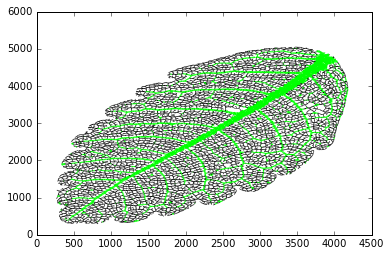

In [19]:
#find the threshold value for the highest 15 percent
percentage = 15
temp = widths.copy()
temp.sort()
index = len(temp)/(100/percentage)
threshold = temp[-int(index)]

def highlight(width, threshold):
    if width > threshold:
        return (0,1,0)
    else:
        return (0,0,0)
        
colors = np.array([highlight(w,threshold) for w in widths])
plt.clf()
nx.draw_networkx_edges(G,pos=pos,width=widths,edge_color=colors)

## d) cycle coloring

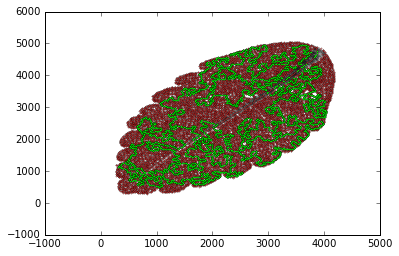

In [23]:
cycles = nx.cycle_basis(G)
cycle_lengths = [len(c) for c in cycles]
longest_cycle_index = cycle_lengths.index(np.asarray(cycle_lengths).max())
longest_cycle = cycles[longest_cycle_index]
plt.clf()
nx.draw_networkx_nodes(G,pos=pos,node_size=2,node_color='FireBrick',alpha=0.6,\
linewidths=0.2)
nx.draw_networkx_edges(G,pos=pos,width=widths,color='DarkSlateGray',alpha=0.4)
nx.draw_networkx_nodes(G,pos=pos,nodelist=longest_cycle,node_color=(0,1,0),\
                       node_size=2,linewidths=0.2)